1. divide dataset into x & y

2. divide into training and testing set

3. perform Linear Regression

4. display the intercept and Regression coefficients

5. Use markdown cell (comments) to write the interpretation of intercepts and Regression cofficients

6. show evalution metrics usng mae, mse, rmse and r2 score

In [2]:
## importing neccessary libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 
%matplotlib inline


In [3]:
# reading the file:
df=pd.read_csv('advertising.csv')

In [4]:
## checking 1st five values from the given dataset:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
## checking last five values from the given dataset:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
## checking detailed info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# checking description :
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
## checking for null values:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

in this data their is no missing values:
    

- if there is any missing values in the case then we xcan handle it like
- by using s.isnull() we can see the there is any missing values are present or not
- then we can use s.isnul().sum() to count the how many missing val are there.
- then we can find their missing values by col or by features name
- then by using s.filna() methodwe can fill he missing values by backword and forword(s.fillna(method="ffill"))
- then we can fill tha all values by zero or we can use catagorical values
- or we can drop the missing values col by using s.dropna method

## Exploratory Data Analysis:

In [9]:
## checking corelation :
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


` pairplot: `

<Figure size 1080x1080 with 0 Axes>

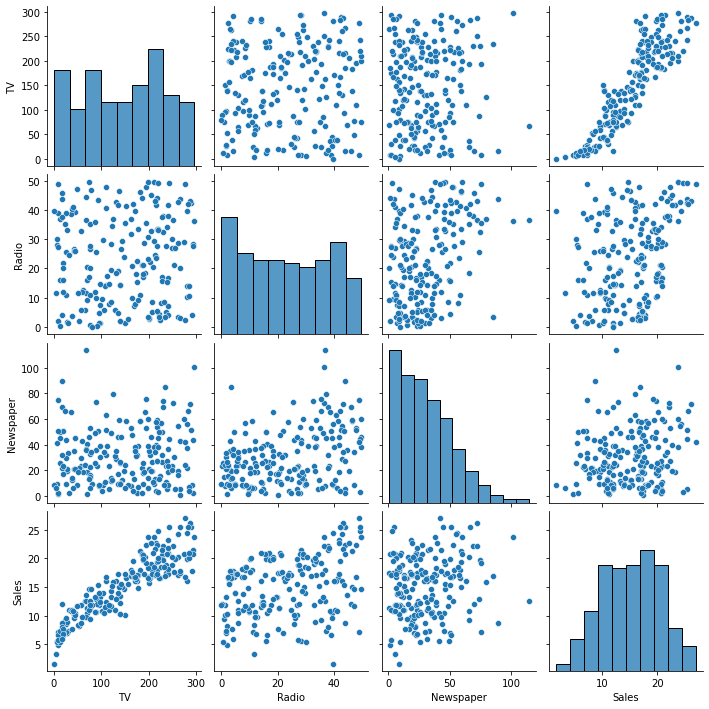

In [10]:

plt.figure(figsize=(15,15))
sns.pairplot(df[["TV","Radio","Newspaper","Sales"]],height=2.5);
plt.show()

` # Observations: `

 - from above paireplot we can see the positive corelation between ` "TV" ` and ` "Sales" `.

` ## Histogram: `

<AxesSubplot:>

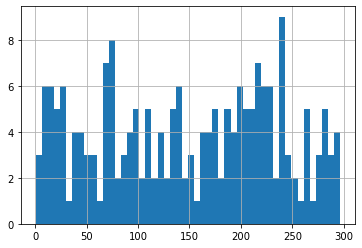

In [11]:

df["TV"].hist(bins=50)

` ## boxplot: `

<AxesSubplot:xlabel='TV'>

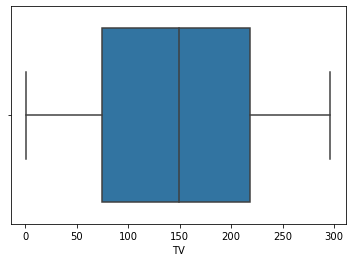

In [12]:
## boxplot:
sns.boxplot(x='TV',data=df,orient='h')

<AxesSubplot:xlabel='Newspaper'>

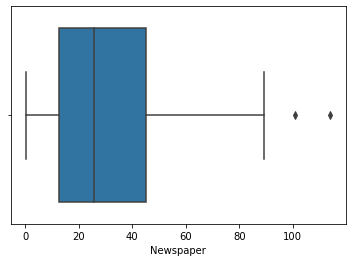

In [13]:
sns.boxplot(x='Newspaper',data=df,orient='h')

- when we plot the boxplot for the ` " Newspaper" ` there is some outliers.

` Handling Missing values: `

In [14]:
Ns_q1=df['Newspaper'].quantile(q=0.25)
Ns_q1

12.75

In [15]:
Ns_q3=df['Newspaper'].quantile(q=0.75)
Ns_q3

45.1

In [16]:
Ns_iqr=Ns_q3-Ns_q1
Ns_iqr

32.35

In [17]:
Min_Ns=Ns_q1-(1.5*Ns_iqr)
Min_Ns

-35.775000000000006

In [18]:
MAX_Ns=Ns_q3+1.5*(Ns_iqr)
MAX_Ns

93.625

In [19]:
upper_outlier=df[df['Newspaper']>93.625]['Newspaper'].count()
upper_outlier

2

In [20]:
lower_outlier= df[df['Newspaper']< -35.775000000000006]['Newspaper'].count()
lower_outlier

0

` # Heatmap: `

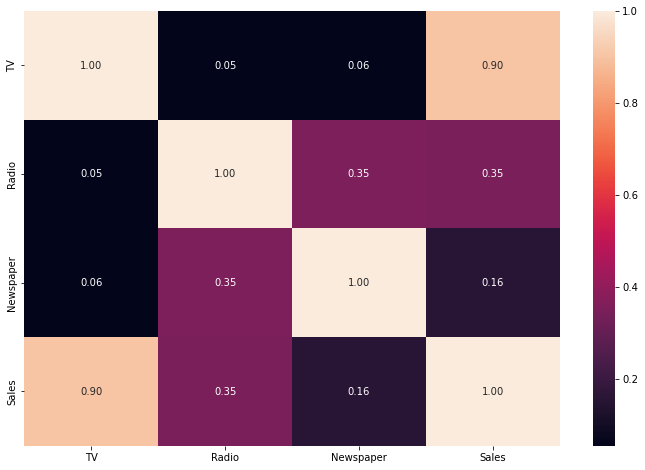

In [21]:

plt.figure(figsize=(12,8))
ax = sns.heatmap(df.corr(),annot=True,fmt=".2f")

 from this Heatmap we can see the the highest corelation bet ` "TV" ` and ` " Sales" ` i.e. 0.90.

## checking for skewness  :

TV
-0.06932836662244649


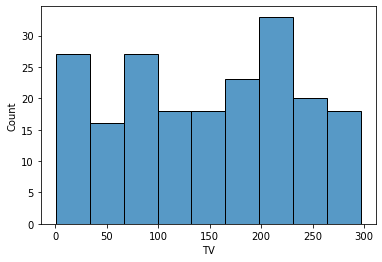

Radio
0.0934668451108453


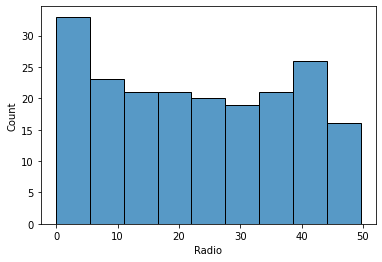

Newspaper
0.8879959753085498


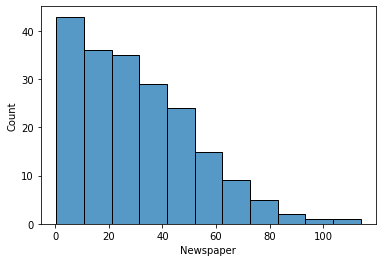

Sales
-0.0731850348821409


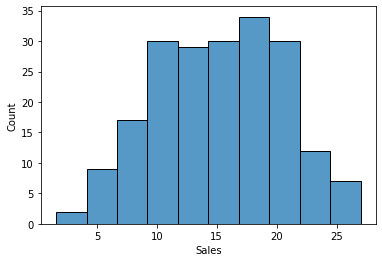

In [22]:
from scipy.stats import skew

for i in df:
    print(i)
    print(skew(df[i]))
    
    sns.histplot(df[i])
    plt.show()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

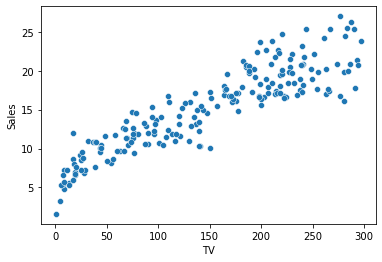

In [23]:
# scatter plot:
sns.scatterplot(data=df, x="TV", y="Sales")

- Here we ploted pairplot between ` 'TV' `and ` "Sales" ` and we got the ` positive corelation ` bet them.

## Moedel Building :

` # selecting X and y: `

In [24]:
X=df["TV"].values.reshape(-1,1)     ## independant variable

In [25]:
y=df['Sales'].values                ## dependant variable

` Checking for Assumptions: `

` Residuals Plot: `

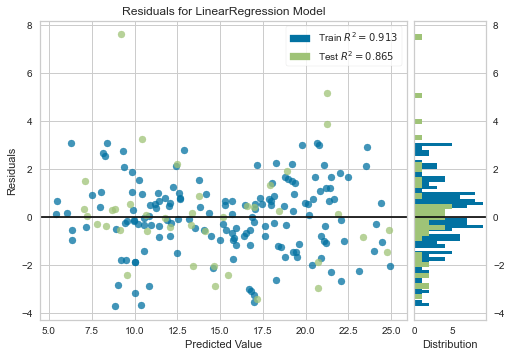

In [96]:
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
model = LinearRegression()
plot_visuals =ResidualsPlot(model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test)

plt.legend(loc='upper left')
plot_visuals.show();

` Normal Distribution: `

- Normal distribution, also known as the Gaussian distribution.
- It is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
- In graph form, normal distribution will appear as a bell curve.

f:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


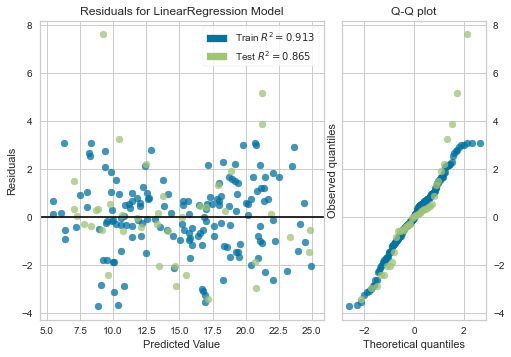

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [97]:
plot_visuals=ResidualsPlot(model, hist=False , qqplot=True)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test) 
plot_visuals.show()

` Homoscedasticity : `

- In regression analysis , homoscedasticity means a situation in which the variance of the dependent variable is the same for all the data.

f:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


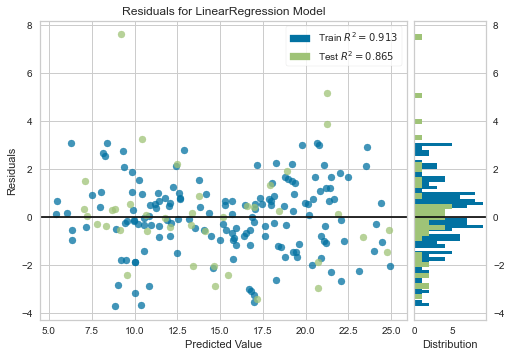

In [98]:
from yellowbrick.regressor import ResidualsPlot
residuals =ResidualsPlot(model)
residuals .fit(X_train,y_train)
residuals .score(X_test,y_test)

plt.legend(loc='upper left')
residuals .show();

In [26]:
df['TV'].values.reshape(-1,1)

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [27]:
df['Sales'].values

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

` spliting Data inti train and test format: `

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test ,  y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression

pl=LinearRegression()

In [30]:
## fitting model:
pl.fit(X_train,y_train)

LinearRegression()

In [31]:
y_test_pred = pl.predict(X_test)
y_train_pred = pl.predict(X_train)

In [32]:

pl.intercept_

7.162275968528904

In [33]:
pl.coef_

array([0.0544343])

## Best fit line:

f:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


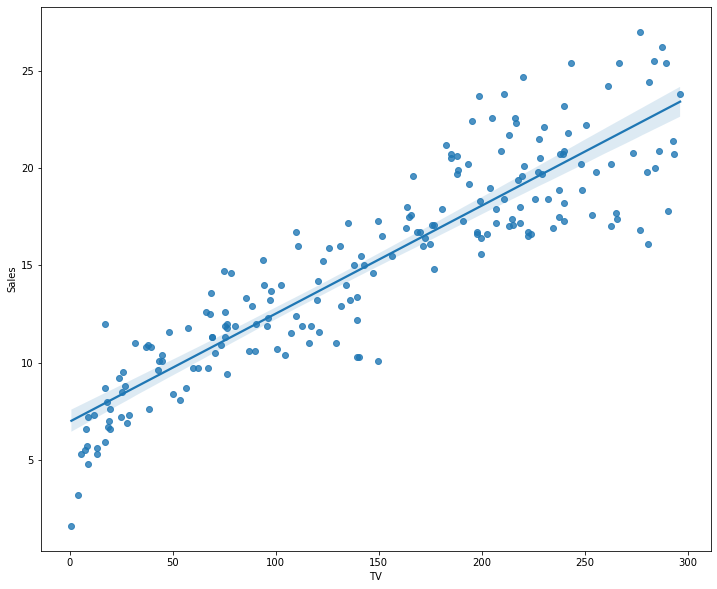

In [34]:
plt.figure(figsize=(12,10));
sns.regplot(X,y);
plt.xlabel('TV')
plt.ylabel("Sales")
plt.show()

## Evalution metrics or Performance Major:

# for single regression:

## MSE:

In [37]:
from sklearn.metrics import mean_squared_error  

In [38]:
#performane major calculated only on "Y" values
MSE=mean_squared_error(y_train,y_train_pred)
print("mean_squared_error_train",MSE)

mean_squared_error_train 4.873755712925826


In [39]:
MSE=mean_squared_error(y_test,y_test_pred)
print("mean_squared_error_test",MSE)

mean_squared_error_test 6.6390912265593


## R2:

In [40]:
from sklearn.metrics import r2_score  

R2=r2_score(y_train,y_train_pred)
print("r2_score_train",R2)

r2_score_train 0.8134588121404831


In [41]:
R2=r2_score(y_test,y_test_pred)
print("r2_score_train",R2)

r2_score_train 0.8010943934328407


In [42]:
from sklearn.metrics import *

MAE=mean_absolute_error(y_train,y_train_pred)
print("mean_absolute_error_train",MAE)

mean_absolute_error_train 1.7878428063044312


In [43]:
MAE=mean_absolute_error(y_test,y_test_pred)
print("mean_absolute_error_train",MAE)

mean_absolute_error_train 2.014867314759479


In [44]:
import math
math.sqrt(mean_squared_error(y_train,y_train_pred))

2.2076584230640903

In [45]:
math.sqrt(mean_squared_error(y_test,y_test_pred))

2.576643403065178

## Coss Validation:

` KFold: `

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pl=LinearRegression()
fold=KFold(n_splits=5,shuffle=True, random_state=50)
train_scores=cross_val_score(pl,X_train,y_train,scoring='r2',cv=5)
print("Train_score:",train_scores)

accuracy_fold_train=np.mean(abs(train_scores))
print("accuracy_fold_train:",accuracy_fold_train)

test_scores=cross_val_score(pl,X_test,y_test,scoring='r2',cv=5)
print("Test_score:",test_scores)

accuracy_fold_test=np.mean(abs(test_scores))
print("accuracy_fold_train:",accuracy_fold_test)

Train_score: [0.81686552 0.8513367  0.82436036 0.78664109 0.76054738]
accuracy_fold_train: 0.8079502106078207
Test_score: [0.95486907 0.87098695 0.70254205 0.66827055 0.72218588]
accuracy_fold_train: 0.7837709023532063


In [47]:
mean_sq_scores=cross_val_score(pl,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print("mean_sq_scores:",mean_sq_scores)
accuracy_fold_mean=np.mean(abs(mean_sq_scores))
accuracy_fold_mean

mean_sq_scores: [-3.57817402 -4.27330184 -5.23975412 -5.42144164 -6.3725451 ]


4.9770433440373845

## Regularization :

In Regularization we have three methods:

    1. Lasso regularization.
    2. Ridge regularization.
    3. Elasticnet regularization.

## Lasso regularization.

In [48]:
from sklearn import linear_model

l1=linear_model.Lasso(alpha=50,max_iter=200,tol=0.1)
l1.fit(X_train,y_train)

test_score=l1.score(X_test,y_test)
train_score=l1.score(X_train,y_train)

print("Lasso Regularization Methiod")

print("lasso_train_score\n{} ".format(train_score))
print("lasso_test_score\n {} ".format(test_score))

Lasso Regularization Methiod
lasso_train_score
0.8001183242090301 
lasso_test_score
 0.7733442561672152 


` CV for Lasso regularization: `

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=2)
train_scores=cross_val_score(l1,X_train,y_train,scoring='r2',cv=5)
print("Train_score \n:",train_scores )

accuracy_fold_train=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",accuracy_fold_train)

test_scores=cross_val_score(l1,X_test,y_test,scoring='r2',cv=5)
print("Test_score \n:",train_scores )


accuracy_fold_test=np.mean(abs(test_scores))
print("accuracy_fold_train \n :",accuracy_fold_test)

Train_score 
: [0.82391624 0.83820719 0.7800137  0.78696896 0.7553023 ]
  accuracy_fold_train 
: 0.7968816774168561
Test_score 
: [0.82391624 0.83820719 0.7800137  0.78696896 0.7553023 ]
accuracy_fold_train 
 : 0.7755866659054107


## Ridge regularization:

In [50]:
from sklearn import linear_model

l2=linear_model.Ridge(alpha=50,max_iter=200,tol=0.1)
l2.fit(X_train,y_train)

test_score=l2.score(X_test,y_test)
train_score=l2.score(X_train,y_train)

print("Ridge Regularization Methiod")

print("Ridge_train_score\n{} ".format(train_score))
print("Ridge_test_score\n {} ".format(test_score))

Ridge Regularization Methiod
Ridge_train_score
0.8134588105965117 
Ridge_test_score
 0.8010889337188476 


` Cv for Ridge regularization: `

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=2)
train_scores=cross_val_score(l1,X_train,y_train,scoring='r2',cv=5)
print("Train_score \n:",train_scores )

accuracy_fold_train=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",accuracy_fold_train)

test_scores=cross_val_score(l1,X_test,y_test,scoring='r2',cv=5)
print("Test_score \n:",train_scores )


accuracy_fold_test=np.mean(abs(test_scores))
print("accuracy_fold_train \n :",accuracy_fold_test)

Train_score 
: [0.82391624 0.83820719 0.7800137  0.78696896 0.7553023 ]
  accuracy_fold_train 
: 0.7968816774168561
Test_score 
: [0.82391624 0.83820719 0.7800137  0.78696896 0.7553023 ]
accuracy_fold_train 
 : 0.7755866659054107


## Elasticnet regularization:-

In [52]:
from sklearn.linear_model import ElasticNet
l3= ElasticNet(alpha =0.1,max_iter=100,tol=0.1)
print(l3.fit(X_train, y_train))

Els_train_s=l3.score(X_train,y_train)
Els_test_s=l3.score(X_test,y_test)
print("For_train:",Els_train_s)
print("For_test:",Els_test_s)

ElasticNet(alpha=0.1, max_iter=100, tol=0.1)
For_train: 0.8134587973083125
For_test: 0.8010774625804551


` CV for Elasticnet regularization: `

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True,random_state=2)
train_scores=cross_val_score(l2,X_train,y_train,scoring='r2',cv=5)
print("Train_score \n:",train_scores )

accuracy_fold_train=np.mean(abs(train_scores))
print("  accuracy_fold_train \n:",accuracy_fold_train)

test_scores=cross_val_score(l2,X_test,y_test,scoring='r2',cv=5)
print("Test_score \n:",test_scores )


accuracy_fold_test=np.mean(abs(test_scores))
print("accuracy_fold_train \n :",accuracy_fold_test)

Train_score 
: [0.81687524 0.85133773 0.82434596 0.78664766 0.76055096]
  accuracy_fold_train 
: 0.807951510912235
Test_score 
: [0.95485543 0.87095447 0.70255409 0.66823599 0.72228493]
accuracy_fold_train 
 : 0.7837769813729963


` Comparison Plot: `

In [102]:
#fit model
model.fit(X_train,y_train)
#get prediction for our model
y_test_pred=model.predict(X_test)

#get prediction for lasso
y_test_pred_lasso=l1.predict(X_test)
#get prediction for Ridge
y_test_pred_ridg=l2.predict(X_test)
#get prediction for els
y_test_pred_els=l3.predict(X_test)

Text(0.5, 1.0, 'Elasicnet')

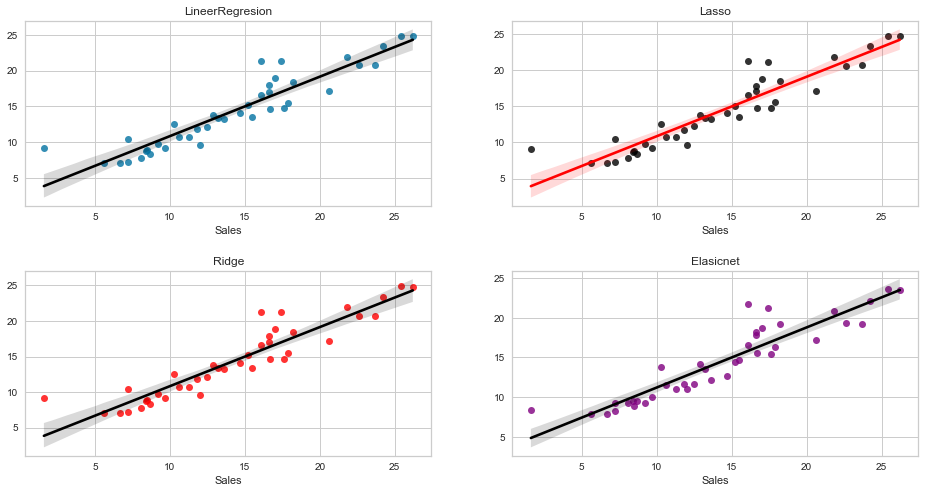

In [103]:
fig, axs = plt.subplots(ncols=2,nrows=2)
fig.set_figheight(8)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=0.35)
sns.regplot(x=y_test,y=y_test_pred,ax=axs[0,0],line_kws={"color":"black"})
axs[0, 0].set_title('LineerRegresion')

sns.regplot(x=y_test,y=y_test_pred_lasso,color="black",ax=axs[0,1],line_kws={"color":"red"})
axs[0,1].set_title('Lasso')
sns.regplot(x=y_test,y=y_test_pred_ridg,color="red",ax=axs[1,0],line_kws={"color":"black"})
axs[1, 0].set_title('Ridge')
sns.regplot(x=y_test,y=y_test_pred_els,color="purple",ax=axs[1,1],line_kws={"color":"black"})
axs[1, 1].set_title('Elasicnet')

## concusion: 
           
 - **In a simple Linear Regression model with an R squared of 0.81 which mean that 81% of the residuals lie on the line of fit.**

##  Multiple Regression:

##  Selection of X and Y for Multiple Regression:

In [54]:
df=pd.read_csv('advertising.csv')
X= df.iloc[:,:-1]
y=df.iloc[:, 3]

` Cheking for Assumptions: `

` Residuals Plot: `

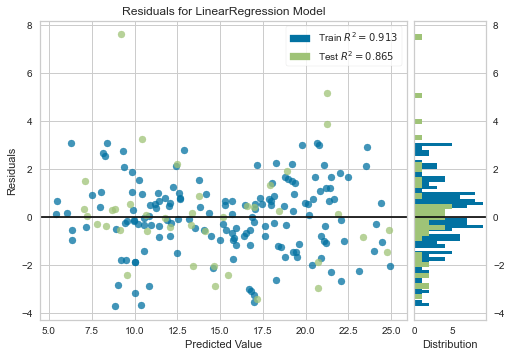

In [99]:
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
model = LinearRegression()
plot_visuals =ResidualsPlot(model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test)

plt.legend(loc='upper left')
plot_visuals.show();

` Normal Distribution: `

- Normal distribution, also known as the Gaussian distribution.
- It is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean.
- In graph form, normal distribution will appear as a bell curve.

f:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


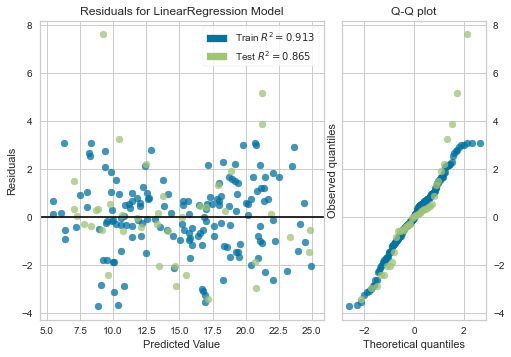

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [100]:
plot_visuals=ResidualsPlot(model, hist=False , qqplot=True)
plot_visuals.fit(X_train,y_train)
plot_visuals.score(X_test,y_test) 
plot_visuals.show()

## Homoscedasticity ::
- In regression analysis , homoscedasticity means a situation in which the variance of the dependent variable is the same for all the data.

f:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


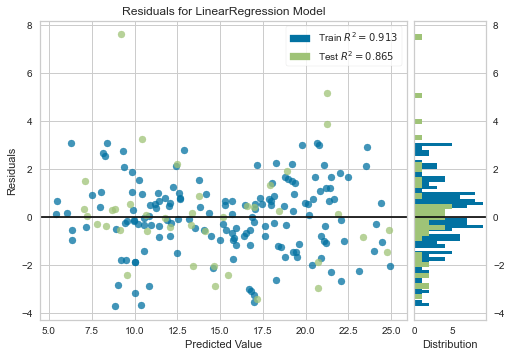

In [101]:
from yellowbrick.regressor import ResidualsPlot
residuals =ResidualsPlot(model)
residuals .fit(X_train,y_train)
residuals .score(X_test,y_test)

plt.legend(loc='upper left')
residuals .show();

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_train,y_train_pred)

0.9132130769530317

In [62]:
r2_score(y_test,y_test_pred)

0.8645053923967724

## MSE :

In [63]:
from sklearn.metrics import mean_squared_error  

In [64]:
#performane major calculated only on "Y" values
mean_squared_error(y_train,y_train_pred)

2.2674791924556543

In [65]:
mean_squared_error(y_test,y_test_pred)

4.522552562041291

## Cross Validation:

` KFold: `

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
lm=LinearRegression()
fold=KFold(n_splits=5,shuffle=True, random_state=25)
scores=cross_val_score(lm,X_train,y_train,scoring='r2',cv=fold)
scores

array([0.93771126, 0.89364482, 0.86437268, 0.91404143, 0.92441704])

In [67]:
mean_sq_scores=cross_val_score(pl,X_train,y_train,scoring='neg_mean_squared_error',cv=fold)
print("mean_sq_scores:",mean_sq_scores)
accuracy_fold_mean=np.mean(abs(mean_sq_scores))
accuracy_fold_mean

mean_sq_scores: [-1.81544379 -1.95826475 -3.89850135 -2.2700014  -1.97832499]


2.384107258228724

In [68]:
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9068374438012086

In [69]:
scores=cross_val_score(lm,X_test,y_test,scoring='r2',cv=5)
scores

array([0.90257663, 0.85567198, 0.70377249, 0.82380324, 0.77076117])

In [70]:
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.8113171033927898

## lasso regularization:

In [81]:
l1=linear_model.Lasso(alpha=1.0,max_iter=200,tol=0.1)
l1.fit(X_train,y_train)

test_score=l1.score(X_test,y_test)
train_score=l1.score(X_train,y_train)

print("Lasso Regularization Method")

print("lasso_train_score\n{} ".format(train_score))
print("lasso_test_score\n {} ".format(test_score))

Lasso Regularization Method
lasso_train_score
0.9128476897656043 
lasso_test_score
 0.8662711188996025 


In [72]:
l1.score(X_test,y_test)

0.7733442561672152

In [73]:
l1.score(X_train,y_train)

0.8001183242090301

` CV for lasso: `

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=2)
train_scores=cross_val_score(l1,X_train,y_train,scoring='r2',cv=5)
print("Train_score \n:",train_scores )

accuracy_fold_train=np.mean(abs(train_scores))
print("accuracy_fold_train \n:",accuracy_fold_train)

test_scores=cross_val_score(l1,X_test,y_test,scoring='r2',cv=5)
print("Test_score \n:",train_scores )


accuracy_fold_test=np.mean(abs(test_scores))
print("accuracy_fold_test \n :",accuracy_fold_test)

Train_score 
: [0.87866522 0.91293214 0.91444185 0.87009229 0.94077454]
accuracy_fold_train 
: 0.9033812084019486
Test_score 
: [0.87866522 0.91293214 0.91444185 0.87009229 0.94077454]
accuracy_fold_test 
 : 0.8168283259134046


## Ridge regulaization:

In [83]:
from sklearn.linear_model import Ridge
l2=Ridge(alpha=50,max_iter=200,tol=0.3)
l2.fit(X_train,y_train)

test_score=l2.score(X_test,y_test)
train_score=l2.score(X_train,y_train)

print("Ridge Regularization Methiod")

print("Ridge_train_score\n{} ".format(train_score))
print("Ridge_test_score\n {} ".format(test_score))

Ridge Regularization Methiod
Ridge_train_score
0.9132128325358134 
Ridge_test_score
 0.8645463413830884 


` CV for Ridge: `

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=5,shuffle=True, random_state=2)
train_scores=cross_val_score(l2,X_train,y_train,scoring='r2',cv=fold)
print("Train_score \n:",train_scores )

accuracy_fold_train_R=np.mean(abs(train_scores))
print("accuracy_fold_train_R \n:",accuracy_fold_train)

test_scores=cross_val_score(l2,X_test,y_test,scoring='r2',cv=fold)
print("Test_score \n:",test_scores )


accuracy_fold_test_R=np.mean(abs(test_scores))
print("accuracy_fold_test_R \n :",accuracy_fold_test)

Train_score 
: [0.92343559 0.90456956 0.91247489 0.91541467 0.86626803]
accuracy_fold_train_R 
: 0.9033812084019486
Test_score 
: [0.68499013 0.58560667 0.64895322 0.96209402 0.91660175]
accuracy_fold_test_R 
 : 0.8168283259134046


## Elasticnet regularization: 

In [85]:
from sklearn.linear_model import ElasticNet
l3= ElasticNet(alpha =25,max_iter=100,tol=0.2)
print(l3.fit(X_train, y_train))

Els_train_s=l3.score(X_train,y_train)
Els_test_s=l3.score(X_test,y_test)
print("For_train:",Els_train_s)
print("For_test:",Els_test_s)

ElasticNet(alpha=25, max_iter=100, tol=0.2)
For_train: 0.8819848276875613
For_test: 0.8463703162605895


` CV for Elasticnet regularization: `

In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


train_score=cross_val_score(l3,X_train,y_train,cv=fold)
print("Train_score:",train_score)

Els_cv_train=np.mean(abs(train_score))
print("K_fold_Train_score:",Els_cv_train)

test_score=cross_val_score(l3,X_test,y_test,cv=fold)
print("Test_score:",test_score)

Els_cv_test=np.mean(abs(test_score))
print("K_fold_test_score:",Els_cv_test)

Train_score: [0.89474352 0.79577433 0.89452845 0.90383225 0.848919  ]
K_fold_Train_score: 0.8675595100496775
Test_score: [0.72685002 0.70200752 0.66871365 0.91310302 0.79501554]
K_fold_test_score: 0.7611379496118748


` Comparison Plot: `

In [91]:
#fit model
lr.fit(X_train,y_train)
#get prediction for our model
y_test_pred=lr.predict(X_test)

#get prediction for lasso
y_test_pred_lasso=l1.predict(X_test)
#get prediction for Ridge
y_test_pred_ridg=l2.predict(X_test)
#get prediction for els
y_test_pred_els=l3.predict(X_test)

Text(0.5, 1.0, 'Elasicnet')

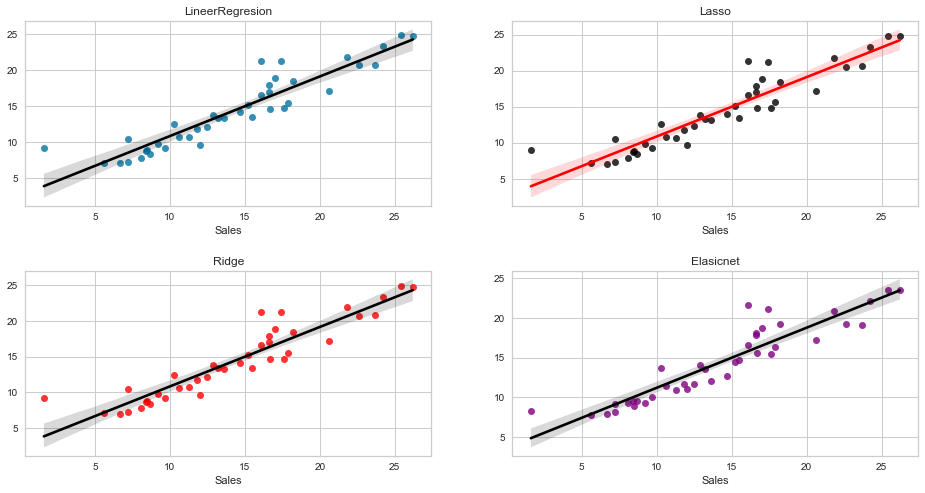

In [93]:
fig, axs = plt.subplots(ncols=2,nrows=2)
fig.set_figheight(8)
fig.set_figwidth(16)
fig.subplots_adjust(hspace=0.35)
sns.regplot(x=y_test,y=y_test_pred,ax=axs[0,0],line_kws={"color":"black"})
axs[0, 0].set_title('LineerRegresion')

sns.regplot(x=y_test,y=y_test_pred_lasso,color="black",ax=axs[0,1],line_kws={"color":"red"})
axs[0,1].set_title('Lasso')
sns.regplot(x=y_test,y=y_test_pred_ridg,color="red",ax=axs[1,0],line_kws={"color":"black"})
axs[1, 0].set_title('Ridge')
sns.regplot(x=y_test,y=y_test_pred_els,color="purple",ax=axs[1,1],line_kws={"color":"black"})
axs[1, 1].set_title('Elasicnet')

In [94]:
print("             All Results      ")
print("-"*50)

print("Results for simple regression:")
print("-"*40)

print("MSE")

print("MSE_Train",MSE)
print("MSE_Test",MSE)

print("r2")

print("r2_score_train",R2)
print("r2_score_test",R2)

print("MAE")

print("mean_absolute_error_train",MAE)
print("mean_absolute_error_test",MAE)

print("Regularization")
print("-"*20)

print("KFold")

print("Train_score:",train_scores)
print("Test_score:",test_scores)
print("accuracy_fold_train:",accuracy_fold_train)
print("accuracy_fold_test:",accuracy_fold_test)

print("Lasso Regularization")
print("-"*20)

print("lasso_train_score\n{} ".format(train_score))
print("lasso_test_score\n {} ".format(test_score))

print("CV for Lasso Regularization")

print("Train_score \n:",train_scores )
print("Test_score \n:",test_scores )
print("  accuracy_fold_train \n:",accuracy_fold_train)
print("accuracy_fold_test \n :",accuracy_fold_test)

print("Ridge Regularization")
print("-"*20)

print("Ridge_train_score\n{} ".format(train_score))
print("Ridge_test_score\n {} ".format(test_score))

print("CV for Ridge Regularization")

print("Train_score \n:",train_scores )
print("Test_score \n:",train_scores )
print("  accuracy_fold_train \n:",accuracy_fold_train)
print("accuracy_fold_test \n :",accuracy_fold_test)

print("Elasticnet regularization:")
print("-"*20)

print("For_train:",Els_train_s)
print("For_test:",Els_test_s)

print("CV for Elasticnet regularization:")

print("Train_score:",train_score)
print("Test_score:",test_score)
print("K_fold_Train_score:",Els_cv_train)
print("K_fold_test_score:",Els_cv_test)

print("Multiple Regression:")
print("-"*40)

print("MSE:")

print("mean_squared_error_train",MSE)
print("mean_squared_error_train",MSE)

print("r2:")

print("r2_score_train",R2)
print("r2_score_test",R2)

print("Lasso Regression:")
print("-"*20)

print("lasso_train_score\n{} ".format(train_score))
print("lasso_test_score\n {} ".format(test_score))

print("CV for Lasso Regression:")

print("Train_score \n:",train_scores )
print("Test_score \n:",test_scores )
print("  accuracy_fold_train \n:",accuracy_fold_train)
print("accuracy_fold_test \n :",accuracy_fold_test)

print("Ridge regularization:")
print("-"*20)

print("Ridge_train_score\n{} ".format(train_score))
print("Ridge_test_score\n {} ".format(test_score))

print("CV for Ridge regularization:")

print("Train_score \n:",train_scores )
print("Test_score \n:",test_scores )
print("  accuracy_fold_train \n:",accuracy_fold_train)
print("accuracy_fold_test \n :",accuracy_fold_test)

print("Elasticnet regularization:")
print("-"*20)

print("For_train:",Els_train_s)
print("For_test:",Els_test_s)

print("CV for Elasticnet regularization:")

print("Train_score:",train_score)
print("Test_score:",test_score)
print("K_fold_Train_score:",Els_cv_train)
print("K_fold_test_score:",Els_cv_test)

print("thank you")
print("-"*50)

             All Results      
--------------------------------------------------
Results for simple regression:
----------------------------------------
MSE
MSE_Train 6.6390912265593
MSE_Test 6.6390912265593
r2
r2_score_train 0.8010943934328407
r2_score_test 0.8010943934328407
MAE
mean_absolute_error_train 2.014867314759479
mean_absolute_error_test 2.014867314759479
Regularization
--------------------
KFold
Train_score: [0.92343559 0.90456956 0.91247489 0.91541467 0.86626803]
Test_score: [0.68499013 0.58560667 0.64895322 0.96209402 0.91660175]
accuracy_fold_train: 0.9033812084019486
accuracy_fold_test: 0.8168283259134046
Lasso Regularization
--------------------
lasso_train_score
[0.89474352 0.79577433 0.89452845 0.90383225 0.848919  ] 
lasso_test_score
 [0.72685002 0.70200752 0.66871365 0.91310302 0.79501554] 
CV for Lasso Regularization
Train_score 
: [0.92343559 0.90456956 0.91247489 0.91541467 0.86626803]
Test_score 
: [0.68499013 0.58560667 0.64895322 0.96209402 0.91660175]
  acc

## conclusion:
- **In Multiple Linear Regression also model with an R squared of 0.77 which mean that 77% of the residuals lie on the line of fit.**

Thank you